# IMPORTING LIBRARY

In [1]:
import requests
from requests import get
import json
from bs4 import BeautifulSoup

# GETTING USER IP

In [2]:
ip = get('https://api.ipify.org').text
print(ip)

185.54.231.10


# LOCATION FROM IP

In [3]:
response = requests.get(f"http://ip-api.com/json/{ip}?fields=country,countryCode,,timezone,currency,isp").json()
country = response['country']
isp = response['isp']
timezone = response['timezone']
print(country,"\n",isp,"\n",timezone)

Malaysia 
 SoftLayer Technologies Inc. 
 Asia/Kuala_Lumpur


# GETTING USER PC TIME

In [4]:

from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print(current_time)

02:11:31


# TIME FROM USER IP

In [5]:
curr_time = requests.get(f"http://worldtimeapi.org/api/timezone/{response['timezone']}").json()
result = curr_time['datetime']
final_time = result[11:19]
print(final_time)

04:41:31


# VALIDATING TIME FROM USER AND IP BASED

In [6]:
if int(current_time[:2]) <= int(final_time[:2])+1 and int(current_time[:2]) >= int(final_time[:2])-1:
    res = "TIME MATCHED"
else:
    res = "TIME MIS-MATCHED"
print(res)

TIME MIS-MATCHED


# IS USER USING ANY PROXY OR VPN TO HIDE IP

In [7]:
fio = requests.get(f"http://proxycheck.io/v2/{ip}?vpn=1&asn=1?key=60753s-542013-u8o159-558p9x").json()
fiop = fio[ip]["proxy"]
print(f"IS_Proxy: {fiop}")

IS_Proxy: yes


# VALIDATING USER

In [8]:
if res == "TIME MIS-MATCHED" and fiop == "yes":
    print("FRAUD USER DETECTED")
else:
    print("VALID USER")

FRAUD USER DETECTED


# <span style='color:red' > DETECING FRAUD TRANSCTION </span>
#----------------------------------------------------------------------------------#

# IMPORTING LIBRARY FOR ALGO

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
LABELS = ["Normal", "Fraud"]

# Loading the dataset to a Pandas DataFrame

In [10]:
credit_card_data = pd.read_csv("creditcard.csv")

# First 5 rows of the dataset

In [11]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# checking the number of missing values in each column

In [12]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Distribution of legit transactions & fraudulent transactions

In [13]:
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0, 0.5, 'Frequency')

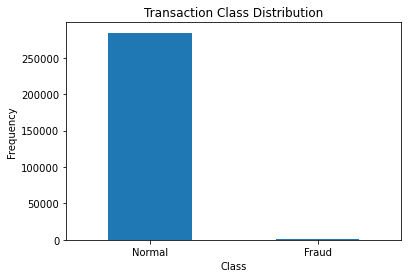

In [14]:
count_classes = pd.value_counts(credit_card_data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

# Separating the data for analysis

In [15]:
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [16]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


# Statistical measures of the data

In [17]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

## We need to analyze more amount of information from the transaction 

# How different are the amount of money used in different transaction classes?

In [18]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

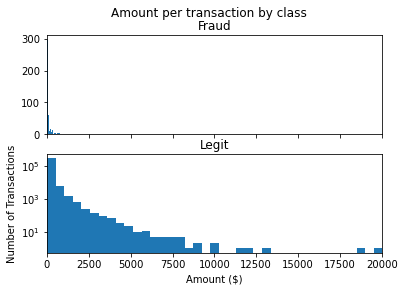

In [19]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(legit.Amount, bins = bins)
ax2.set_title('Legit')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

# compare the values for both transactions

In [20]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [21]:
legit_sample = legit.sample(n=492)

In [22]:
legit_sample = legit.sample(n=492)

In [23]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [24]:
new_dataset.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
267336,162728.0,1.754554,-0.699398,-0.076332,0.443915,-0.672082,0.389061,-0.807534,0.202915,0.858635,...,0.141950,0.358412,0.259748,0.746839,-0.560808,0.104636,-0.005853,-0.019622,94.80,0
140569,83796.0,-0.409400,0.485120,0.203393,-2.242623,0.624134,-0.663543,1.116180,-0.883246,-0.500138,...,0.189345,0.927277,-0.273201,-0.500021,-0.671129,-0.518954,-0.498879,-0.355371,15.00,0
52712,45601.0,0.948969,-0.725630,1.137013,0.362398,-1.285355,-0.076707,-0.594726,0.149942,1.184001,...,-0.124432,-0.299423,0.061616,0.476587,-0.021325,0.941753,-0.036603,0.031630,110.00,0
89689,62685.0,-1.340955,1.671960,0.715703,0.488751,0.178795,0.417730,0.307148,0.499287,-0.209928,...,0.174592,0.749126,-0.060527,-0.301645,-0.319627,-0.316057,0.090222,0.039932,3.65,0
227511,145105.0,-0.963363,1.068093,0.154619,-1.051201,0.480160,-0.451368,0.693622,0.059487,0.254871,...,0.216530,0.885248,-0.366959,-0.255018,-0.078712,0.059582,-0.305424,-0.067675,1.00,0


In [25]:
new_dataset['Class'].value_counts()


0    492
1    492
Name: Class, dtype: int64

In [26]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93948.091463,-0.309901,-0.127007,-0.064646,-0.020736,-0.165243,-0.012884,0.129834,-0.128922,-0.075670,...,-0.029152,-0.087958,0.006425,0.067094,-0.002431,0.012844,-0.003903,0.035325,-0.036307,129.382236
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [27]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [28]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
267336  162728.0  1.754554 -0.699398 -0.076332  0.443915 -0.672082  0.389061   
140569   83796.0 -0.409400  0.485120  0.203393 -2.242623  0.624134 -0.663543   
52712    45601.0  0.948969 -0.725630  1.137013  0.362398 -1.285355 -0.076707   
89689    62685.0 -1.340955  1.671960  0.715703  0.488751  0.178795  0.417730   
227511  145105.0 -0.963363  1.068093  0.154619 -1.051201  0.480160 -0.451368   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [29]:
print(Y)

267336    0
140569    0
52712     0
89689     0
227511    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


# Spliting data-set

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [31]:
model = LogisticRegression()

In [32]:
model.fit(X_train, Y_train)

LogisticRegression()

# Accuracy on training data

In [33]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [34]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9148665819567979


# Accuracy on test data

In [35]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [36]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9035532994923858
